False
The Scaled features are : ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
                age      trestbps          chol       thalach       oldpeak
count  1.025000e+03  1.025000e+03  1.025000e+03  1.025000e+03  1.025000e+03
mean  -3.431402e-16 -7.036106e-16 -3.466062e-18 -4.332578e-16 -2.426243e-16
std    1.000488e+00  1.000488e+00  1.000488e+00  1.000488e+00  1.000488e+00
min   -2.804866e+00 -2.148237e+00 -2.327054e+00 -3.397080e+00 -9.123291e-01
25%   -7.095548e-01 -6.632165e-01 -6.787242e-01 -7.442713e-01 -9.123291e-01
50%    1.726817e-01 -9.205458e-02 -1.163527e-01  1.255019e-01 -2.311765e-01
75%    7.240794e-01  4.791073e-01  5.623715e-01  7.343432e-01  6.202642e-01
max    2.488552e+00  3.906079e+00  6.166694e+00  2.299935e+00  4.366603e+00
Categorical columns: Index([], dtype='object')


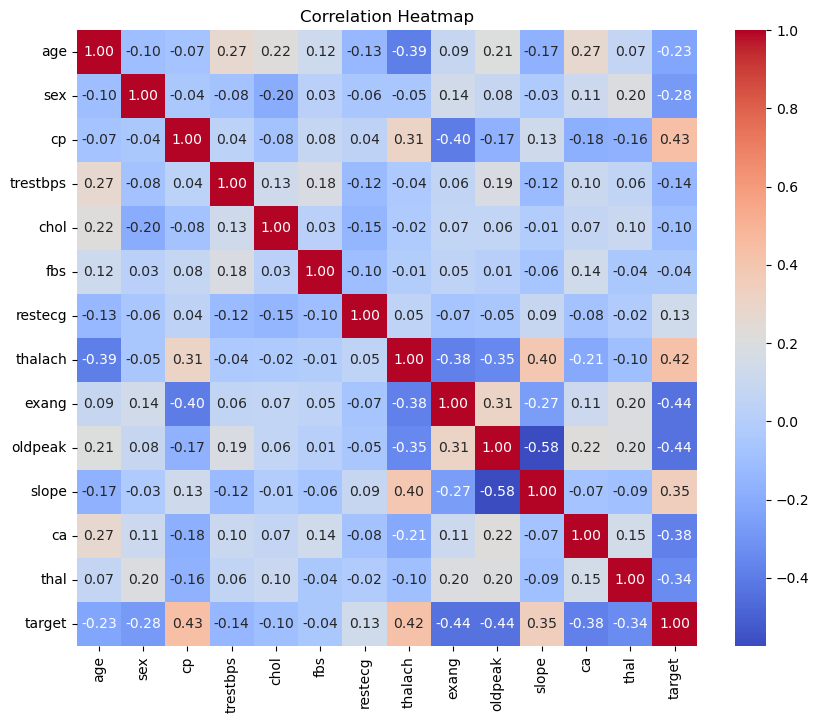

Accuracy on training date(LogisticRegression): 0.8517412935323383
Accuracy on testing date(LogisticRegression): 0.85
Average Accuracy: 0.8447744146202171
Confusion Matrix:
[[10  3]
 [ 0  7]]


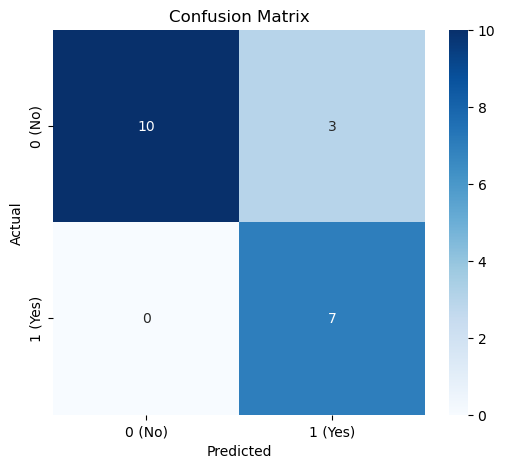

Accuracy on training date(RandomForrest): 0.9900497512437811
Accuracy on testing date(RandomForrest): 1.0
Average Accuracy: 0.9619265181800876
Confusion Matrix:
[[13  0]
 [ 0  7]]


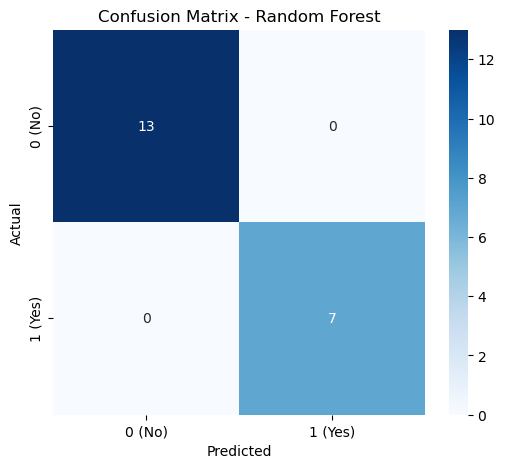

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


df = pd.read_csv('heart.csv')

df.isnull().values.any()
print(df.isnull().values.any())

numericalfeatures = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler=StandardScaler()
df[numericalfeatures]=scaler.fit_transform(df[numericalfeatures])
print("The Scaled features are :",numericalfeatures)

print(df[numericalfeatures].describe())

categoricalcolumns=df.select_dtypes(include=['category']).columns
print("Categorical columns:", categoricalcolumns)

corr_map = df.corr() 


plt.figure(figsize=(10, 8))
sns.heatmap(corr_map, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

x=df.iloc[:,:-1]
y=df.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=0)

logisticmodel=LogisticRegression()

logisticmodel.fit(x_train,y_train)
pred_trainingdata_lr=logisticmodel.predict(x_train)
accuracy_trainingdata_lr=accuracy_score(y_train,pred_trainingdata_lr)
print("Accuracy on training date(LogisticRegression):",accuracy_trainingdata_lr)

predict_testingdata_lr=logisticmodel.predict(x_test)
accuracy_testingdata_lr=accuracy_score(y_test,predict_testingdata_lr)
print("Accuracy on testing date(LogisticRegression):",accuracy_testingdata_lr)

lr_cv_scores = cross_val_score(logisticmodel, x, y, cv=10)


print(f"Average Accuracy: {lr_cv_scores.mean()}")

cm_lr = confusion_matrix(y_test, predict_testingdata_lr)
print("Confusion Matrix:")
print(cm_lr)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['0 (No)', '1 (Yes)'], yticklabels=['0 (No)', '1 (Yes)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

randomforestmodel=RandomForestClassifier(n_estimators=100,          
    max_depth=10,            
    min_samples_split=10,      
    min_samples_leaf=5,        
    random_state=0)
randomforestmodel.fit(x_train,y_train)
predict_trainingdata_rf=randomforestmodel.predict(x_train)
accuracy_trainingdata_rf=accuracy_score(y_train,predict_trainingdata_rf)
print("Accuracy on training date(RandomForrest):",accuracy_trainingdata_rf)

predict_testingdata_rf=randomforestmodel.predict(x_test)
accuracy_testingdata_rf=accuracy_score(y_test,predict_testingdata_rf)
print("Accuracy on testing date(RandomForrest):",accuracy_testingdata_rf)


rf_cv_scores = cross_val_score(randomforestmodel, x, y, cv=10)

print(f"Average Accuracy: {rf_cv_scores.mean()}")
cm_rf = confusion_matrix(y_test, predict_testingdata_rf)
print("Confusion Matrix:")
print(cm_rf)



plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['0 (No)', '1 (Yes)'], yticklabels=['0 (No)', '1 (Yes)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()



In [2]:
model_comparison = {
    "Model": ["Logistic Regression", "Random Forest"],
    "Training Accuracy": [accuracy_trainingdata_lr, accuracy_trainingdata_rf],
    "Testing Accuracy": [accuracy_testingdata_lr, accuracy_testingdata_rf],
    "Cross-Validation Accuracy": [lr_cv_scores.mean(), rf_cv_scores.mean()]
}
comparison_df = pd.DataFrame(model_comparison)
print(comparison_df)

                 Model  Training Accuracy  Testing Accuracy  \
0  Logistic Regression           0.851741              0.85   
1        Random Forest           0.990050              1.00   

   Cross-Validation Accuracy  
0                   0.844774  
1                   0.961927  


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


df = pd.read_csv('heart.csv')

print("Missing Values:", df.isnull().sum())


categorical_features = ['cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'sex']
encoder = LabelEncoder()

# Apply label encoding to categorical features
for feature in categorical_features:
    df[feature] = encoder.fit_transform(df[feature])

# Standardizing numerical features
numericalfeatures = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
df[numericalfeatures] = scaler.fit_transform(df[numericalfeatures])

# Splitting the data
x = df.drop('target', axis=1)  
y = df['target']               

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

logisticmodel = LogisticRegression(max_iter=200)
logisticmodel.fit(x_train, y_train)


randomforestmodel = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=0)
randomforestmodel.fit(x_train, y_train)

# Example Data Point for Prediction (Make sure it has the same structure as training data)
example_data = {
    'age': [55],           # Example age
    'sex': [1],            # Example sex (encoded: 1 for male, 0 for female)
    'cp': [1],             # Example chest pain type (encoded)
    'trestbps': [140],     # Example resting blood pressure
    'chol': [250],         # Example serum cholesterol
    'thalach': [160],      # Example max heart rate
    'oldpeak': [1.5],      # Example ST depression
    'fbs': [0],            # Example fasting blood sugar (encoded)
    'restecg': [0],        # Example resting electrocardiographic results (encoded)
    'exang': [0],          # Example exercise induced angina (encoded)
    'slope': [1],          # Example slope of peak exercise ST segment (encoded)
    'ca': [0],             # Example number of major vessels colored by fluoroscopy (encoded)
    'thal': [2]            # Example thalassemia (encoded)
}


example_df = pd.DataFrame(example_data)


example_df[numericalfeatures] = scaler.transform(example_df[numericalfeatures])

# Ensure the example_df contains all the features in the same order as the training data
example_df = example_df[x_train.columns]  # Align with the training features

# Predict using Logistic Regression
logistic_pred = logisticmodel.predict(example_df)
print("Logistic Regression Prediction: ", logistic_pred)

# Predict using Random Forest
rf_pred = randomforestmodel.predict(example_df)
print("Random Forest Prediction: ", rf_pred)


Missing Values: age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Logistic Regression Prediction:  [0]
Random Forest Prediction:  [1]


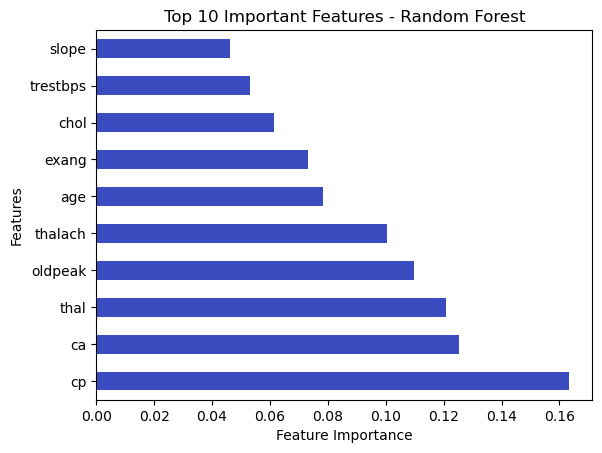

In [4]:
feature_importance = pd.Series(randomforestmodel.feature_importances_, index=x.columns)
feature_importance.nlargest(10).plot(kind='barh', colormap='coolwarm')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Important Features - Random Forest')
plt.show()


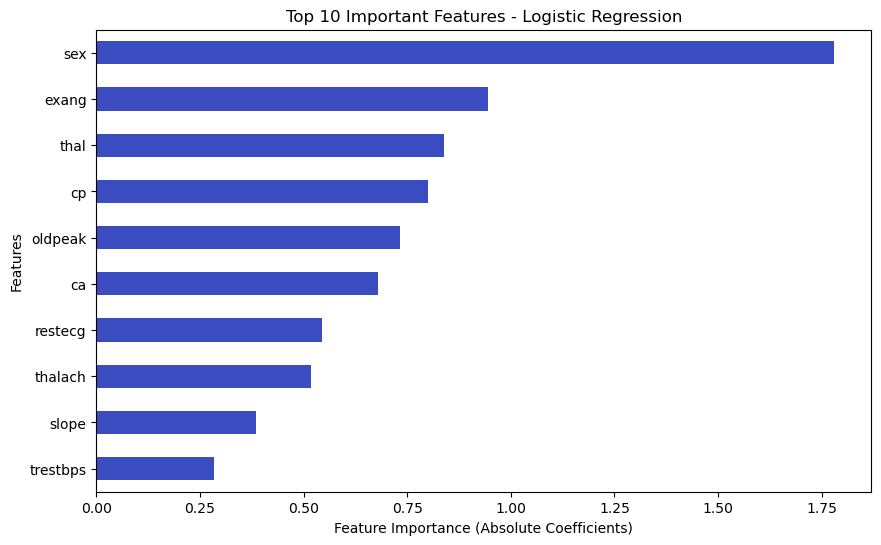

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importance using absolute values of coefficients
feature_importance_lr = pd.Series(abs(logisticmodel.coef_[0]), index=x.columns)

# Plot top 10 important features
plt.figure(figsize=(10, 6))
feature_importance_lr.nlargest(10).plot(kind='barh', colormap='coolwarm')
plt.xlabel('Feature Importance (Absolute Coefficients)')
plt.ylabel('Features')
plt.title('Top 10 Important Features - Logistic Regression')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


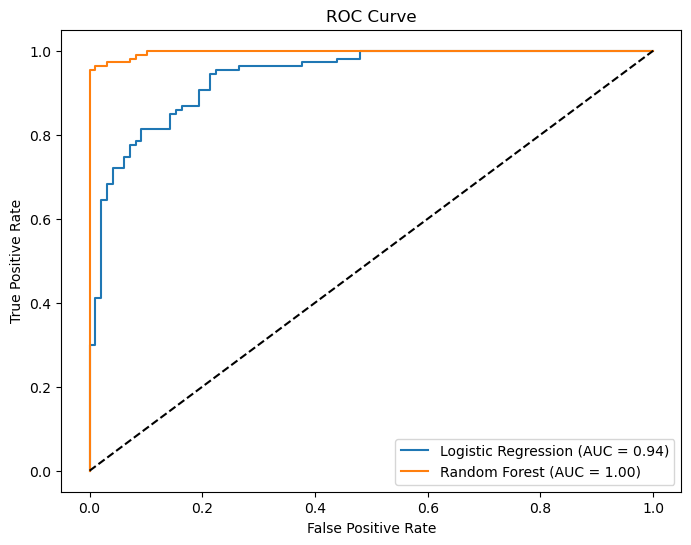

In [6]:
from sklearn.metrics import roc_curve, auc

y_pred_prob_lr = logisticmodel.predict_proba(x_test)[:, 1]
y_pred_prob_rf = randomforestmodel.predict_proba(x_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.2f})'.format(auc(fpr_lr, tpr_lr)))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(auc(fpr_rf, tpr_rf)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
